# Example using `__geo_interface__`

The `__geo_interface__` specification suggested by Sean Gilles ([gist](https://gist.github.com/sgillies/2217756)) vastly expands the capabilities of *Karta* by making data interchange with external modules simple. This example shows how the popular [shapely](https://github.com/Toblerity/Shapely) package can to used to apply a buffer to a *Karta* polygon.

In [1]:
from karta.examples import greenland
from karta.vector.read import from_shape
import shapely.geometry

Pass the data in the `greenland` Polygon to shapely.

In [3]:
shapely_poly = shapely.geometry.shape(greenland)

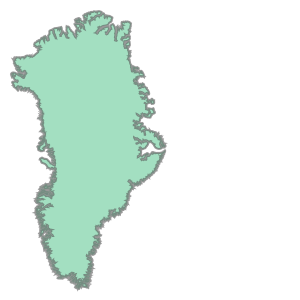

In [4]:
shapely_poly

Use shapely to call the GEOS library's `GEOSBuffer` function (takes several seconds on my machine).

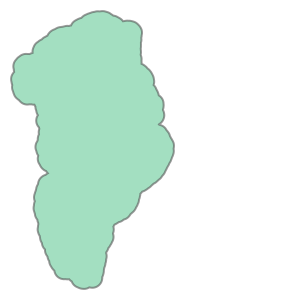

In [6]:
shapely_poly_buffered = shapely_poly.buffer(100e3)
shapely_poly_buffered

Convert the data back to a *Karta* Polygon. Since shapely doesn't handle coordinate systems, we need to set the original coordinate system from the old Polygon.

In [7]:
greenland_buffered = from_shape(shapely_poly_buffered)
greenland_buffered._crs = greenland.crs